# Importing necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import analysis_functions as analysis

# 1. Recommendation System with LSH

## 1.1 Data Preparation

### Main dataframe 

#### Loading

In [3]:
# Load the dataset for ratings and the one for movies
df_ratings = pd.read_csv("archive/rating.csv")
df_movies = pd.read_csv("archive/movie.csv")

# Creating main df for our analysis (for now)
main_df = pd.merge(df_ratings, df_movies, on="movieId")

#### Analysis

In [ ]:
# view shape of df
analysis.find_shape(main_df)

(20000263, 6)

In [4]:
 # check columns info and dtypes...
analysis.find_info(main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 915.5+ MB


In [ ]:
# calculate statistical summary for numerical columns and summary for non numeric columns
analysis.find_desc(main_df)

(             userId       movieId        rating
 count  2.000026e+07  2.000026e+07  2.000026e+07
 mean   6.904587e+04  9.041567e+03  3.525529e+00
 std    4.003863e+04  1.978948e+04  1.051989e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    3.439500e+04  9.020000e+02  3.000000e+00
 50%    6.914100e+04  2.167000e+03  3.500000e+00
 75%    1.036370e+05  4.770000e+03  4.000000e+00
 max    1.384930e+05  1.312620e+05  5.000000e+00,
                   timestamp                title    genres
 count              20000263             20000263  20000263
 unique             15351121                26729      1329
 top     1996-03-01 00:00:00  Pulp Fiction (1994)     Drama
 freq                    643                67310   1467402)

In [ ]:
# check df for null values
analysis.find_null_vals(main_df)

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [6]:
# check df for duplicated rows
analysis.find_dup(main_df)

0

In [7]:
# Check the number of unique users and movies
print(f"Number of unique users: {main_df['userId'].nunique()}")
print(f"Number of unique movies: {main_df['movieId'].nunique()}")


Number of unique users: 138493
Number of unique movies: 26744


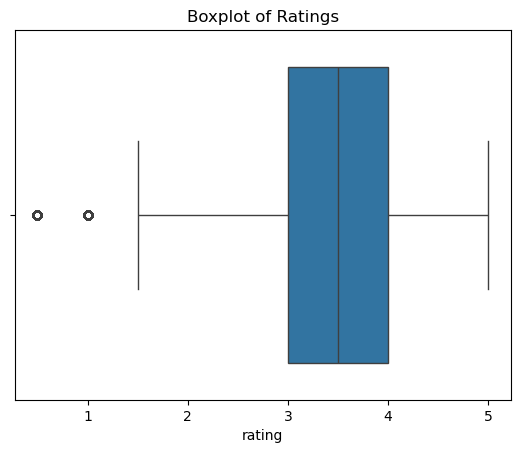

In [75]:
# check for outliers
sns.boxplot(x=main_df['rating'])
plt.title('Boxplot of Ratings')
plt.show()

# values around 1 are considered outliers, because probably not a lot of movies have a low rating


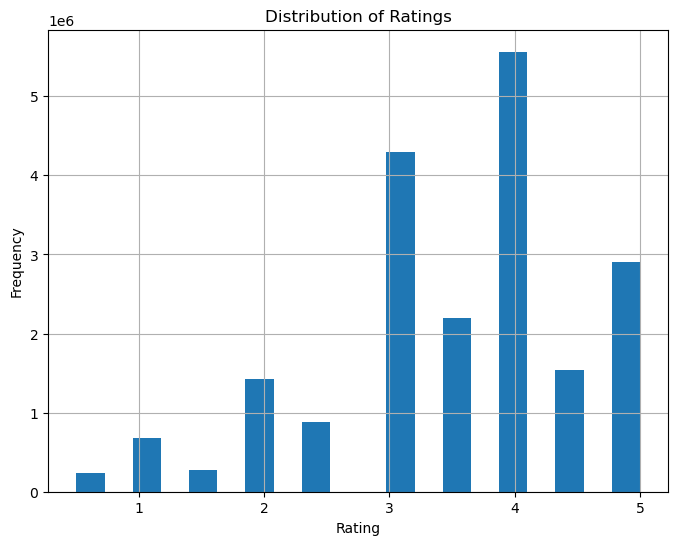

In [87]:
# Histogram to visualise the frequency of each rating score 
main_df['rating'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# understand what is the lowest rating given 
main_df['rating'].min()

0.5

In [77]:
# Check user activity (number of ratings per user)
user_activity = main_df['userId'].value_counts()
print(user_activity)

# Check movie popularity (number of ratings per movie)
movie_popularity = main_df['movieId'].value_counts()
print(movie_popularity)


userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: count, Length: 138493, dtype: int64
movieId
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
125545        1
78873         1
112907        1
112909        1
110510        1
Name: count, Length: 26744, dtype: int64


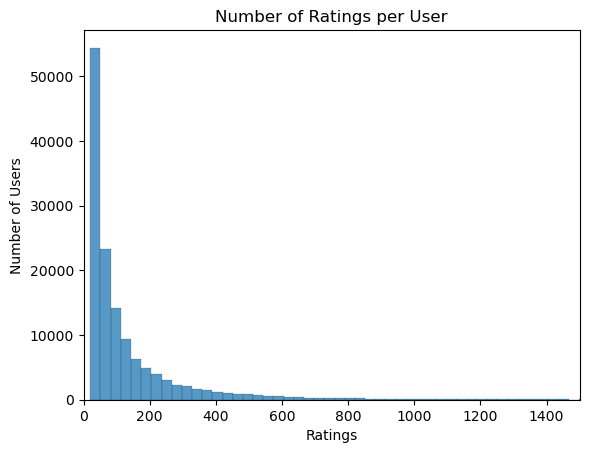

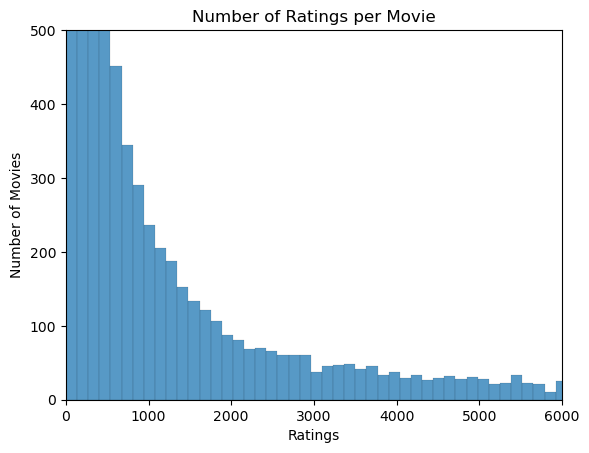

In [ ]:
# User activity visualised on graph
sns.histplot(user_activity, bins=300, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 1500)
plt.show()

# Movie popularity visualised on graph
sns.histplot(movie_popularity, bins=500, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.xlim(0, 6000)
plt.ylim(0, 500)
plt.show()

In [10]:
# In the main_df description we can notice that drama is the top genre so we decide to dig a little deeper
drama_movies = main_df['genres'].str.contains('Drama')
display(main_df[drama_movies].head())
drama_movies.shape


,userId,movieId,rating,timestamp,title,genres
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
6,1,151,4.0,2004-09-10 03:08:54,Rob Roy (1995),Action|Drama|Romance|War
8,1,253,4.0,2005-04-02 23:35:40,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
10,1,293,4.0,2005-04-02 23:31:43,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
11,1,296,4.0,2005-04-02 23:32:47,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


(20000263,)

In [11]:
# Show the first 10 high rated movies
high_rated = main_df['rating']>4.0
main_df[high_rated].head(10)

,userId,movieId,rating,timestamp,title,genres
30,1,1196,4.5,2005-04-02 23:32:22,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
31,1,1198,4.5,2005-04-02 23:30:24,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
131,1,4993,5.0,2005-04-02 23:31:22,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
142,1,5952,5.0,2005-04-02 23:30:19,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
158,1,7153,5.0,2005-04-02 23:30:33,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
170,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),Crime|Drama|Horror
171,1,8636,4.5,2005-04-02 23:44:53,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
176,2,62,5.0,2000-11-21 15:29:58,Mr. Holland's Opus (1995),Drama
177,2,70,5.0,2000-11-21 15:31:31,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
180,2,260,5.0,2000-11-21 15:36:54,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [ ]:
# show the top 10 most rated movies
most_rated = main_df.groupby('title').size().sort_values(ascending=False)[:10]
most_rated

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
dtype: int64

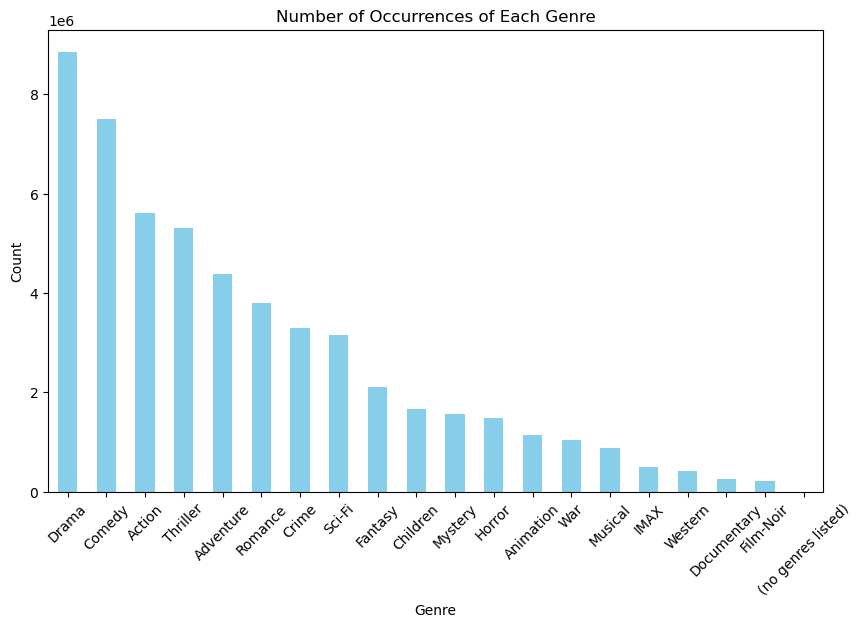

In [18]:
# Split the genres column and count occurrences
# Create a flat list of all genres
all_genres = main_df['genres'].str.split('|').explode()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Visualize the counts using a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Handling timestamps

In [5]:
# Handle the timestamp column converting it to datetime
main_df['timestamp'] = pd.to_datetime(main_df['timestamp']) 
print(df_ratings['timestamp'].head())

# checking dtype of timestamp column changed
main_df.info()

# not needed it until now...
''' 
# Extract useful time-based features (e.g., year, month)
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
print(df.head())
'''


0    2005-04-02 23:53:47
1    2005-04-02 23:31:16
2    2005-04-02 23:33:39
3    2005-04-02 23:32:07
4    2005-04-02 23:29:40
Name: timestamp, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
 4   title      object        
 5   genres     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 915.5+ MB


" \n# Extract useful time-based features (e.g., year, month)\ndf['year'] = df['timestamp'].dt.year\ndf['month'] = df['timestamp'].dt.month\ndf['day_of_week'] = df['timestamp'].dt.dayofweek\ndf['day'] = df['timestamp'].dt.day\ndf['hour'] = df['timestamp'].dt.hour\ndf['minute'] = df['timestamp'].dt.minute\ndf['second'] = df['timestamp'].dt.second\nprint(df.head())\n"

### Other dataframes

#### Loading

In [2]:
# Load the rest of the dfs
all_dfs = []
df_genome_scores = pd.read_csv("archive/genome_scores.csv")
df_genome_tags = pd.read_csv("archive/genome_tags.csv")
df_links = pd.read_csv("archive/link.csv")
df_tags = pd.read_csv("archive/tag.csv")
all_dfs.append(("genome_scores", df_genome_scores))
all_dfs.append(("genome_tags", df_genome_tags))
all_dfs.append(("links", df_links))
all_dfs.append(("tags", df_tags))

#### Analysis

In [ ]:
# Analyse the rest of the df information
for df_name, dataframe in all_dfs:
    print("--------", df_name, "------------")
    print("--------- df shape")
    print(analysis.find_shape(dataframe))
    print("--------- df info")
    print(analysis.find_info(dataframe))
    print("--------- df description")
    print(analysis.find_desc(dataframe))
    print("--------- df null count")
    print(analysis.find_null_vals(dataframe))
    print("--------- df duplicate count")
    print(analysis.find_dup(dataframe))
    

-------- genome_scores ------------
--------- df shape
(11709768, 3)
--------- df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB
None
--------- df description
            movieId         tagId     relevance
count  1.170977e+07  1.170977e+07  1.170977e+07
mean   2.584297e+04  5.645000e+02  1.164833e-01
std    3.467615e+04  3.256254e+02  1.542463e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    2.926000e+03  2.827500e+02  2.425000e-02
50%    6.017000e+03  5.645000e+02  5.650000e-02
75%    4.606200e+04  8.462500e+02  1.415000e-01
max    1.311700e+05  1.128000e+03  1.000000e+00
None
--------- df null count
movieId      0
tagId        0
relevance    0
dtype: int64
--------- df duplicate count
0
-------- genome_tags ------------
--------- df 

We notice that the links and tags df contains null values, so we handle it in this phase 

#### Cleaning

In [3]:
# We fill nan values with empty space in order not to lose any important information
df_links.fillna(" ")

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [4]:
# We drop nan values because they are very few and this df only contains information on tags, 
# and if the tag is not present, the row doesnt make sense
df_tags.dropna()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


**Further analysis of these dfs can be added if needed later on in the project**

## 1.2 Minhash Signatures